<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_22_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [3]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [4]:
pd.read_csv(total_file_link[2])

r/R  mean_delta_x  std_delta_x  mean_delta_y  std_delta_y  \
0   0.2001        0.0434       0.0026       -0.0126       0.0013   
1   0.2499       -0.0157       0.0019       -0.0235       0.0031   
2   0.2998       -0.0418       0.0016       -0.0514       0.0053   
3   0.3498       -0.0550       0.0016       -0.0961       0.0091   
4   0.3913       -0.0646       0.0024       -0.1332       0.0133   
5   0.4496       -0.1020       0.0026       -0.1704       0.0173   
6   0.4997       -0.1255       0.0030       -0.2004       0.0207   
7   0.5387       -0.1535       0.0028       -0.2193       0.0230   
8   0.5996       -0.1964       0.0031       -0.2466       0.0273   
9   0.6498       -0.2235       0.0031       -0.2726       0.0316   
10  0.6998       -0.2741       0.0030       -0.2945       0.0354   
11  0.7500       -0.3002       0.0029       -0.3091       0.0391   
12  0.8001       -0.3363       0.0029       -0.3486       0.0430   
13  0.8497       -0.3810       0.0031       -0.3719       0.0474   
14  0.9102       -0.4236       0.0032       -0.3486       0.0526   
15  0.9734       -0.3914       0.0037       -0.3834       0.0581   

    mean_delta_z  std_delta_z  
0        -0.0162       0.0040  
1        -0.0061       0.0079  
2        -0.0781       0.0130  
3        -0.1268       0.0216  
4        -0.1839       0.0303  
5        -0.3251       0.0405  
6        -0.4803       0.0503  
7        -0.6758       0.0569  
8        -0.9893       0.0678  
9        -1.3829       0.0783  
10       -1.7870       0.0876  
11       -2.2590       0.0965  
12       -2.7745       0.1069  
13       -3.3516       0.1185  
14       -4.1247       0.1339  
15       -4.8769       0.1475

In [5]:
total_alpha_content = [ i / 1000 for i in range( 40 , 50  )  ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 5 , 16))

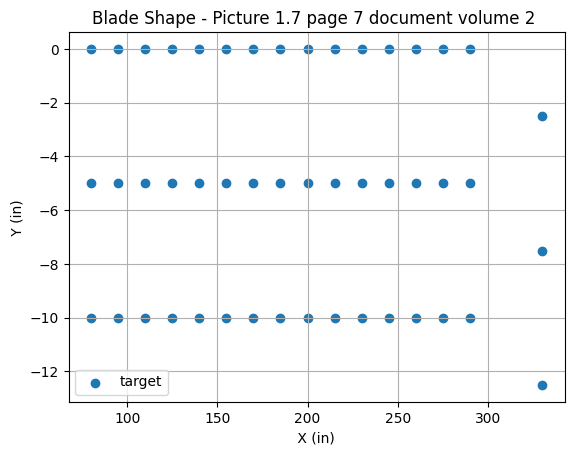

In [6]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [7]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.04 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9738181037257954
r2_score in Simulation Failt  void  for Each Blade :  0.977393281280142
Error in Simulation Fault for Each Blade :  0.5348621875189918  --- r2_score Fault S ----  0.9810670662043536
Error in Simulation Fault T  for Each Blade :  0.5348621875189918  --- r2_score Fault T :  0.9913720934049866
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9717208119676092
r2_score in Simulation Failt  void  for Each Blade :  0.985773243005612
Error in Simulation Fault for Each Blade :  -0.6154190000005899  --- r2_score Fault S ----  0.9870425902012894
Error in Simulation Fault T  for Each Blade :  -0.6154190000005899  --- r2_score Fault T :  0.9356425192128345
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9834510713886353
r2_score in Simulation Failt  void  for Each Blade :  0.9835085052144761
Error in Simulation Fault f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.38636363636363635
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2662 - loss: 1.4487 - val_acc: 0.3005 - val_loss: 1.3826
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2890 - loss: 1.3940 - val_acc: 0.3005 - val_loss: 1.3691
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2725 - loss: 1.3772 - val_acc: 0.3460 - val_loss: 1.3631
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3184 - loss: 1.3669 - val_acc: 0.3384 - val_loss: 1.3585
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3234 - loss: 1.3660 - val_acc: 0.3434 - val_loss: 1.3549
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3217 - loss: 1.3633 - val_acc: 0.3384 - val_loss: 1.3519
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3083 - loss: 1.3546 - val_acc: 0.3384 - val_loss: 1.3492
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3199 - loss: 1.3397 - val_acc: 0.3409 - val_loss: 1.3470
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2976 - loss:

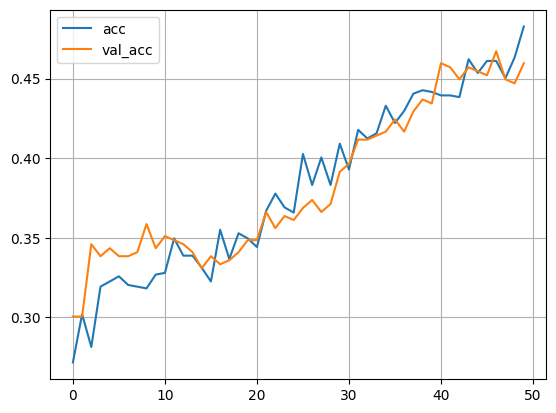

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4729 - loss: 1.0947 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.04 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9573577511481404
r2_score in Simulation Failt  void  for Each Blade :  0.976219321494366
Error in Simulation Fault for Each Blade :  -0.9629568044064958  --- r2_score Fault S ----  0.9730962319364646
Error in Simulation Fault T  for Each Blade :  -0.9629568044064958  --- r2_score Fault T :  0.981782935094596
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9903502969793965
r2_score in Simulation Failt  void  for Each Blade :  0.989779993230593
Error in Simulation Fault for Each Blade :  -1.9771990201093634  --- r2_score Fault S ----  0.9681893174287693
Error in Simulation Fault T  for Each Blade :  -1.9771990201093634  --- r2_score Fault T :  0.9583131311649636
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.29545454545454547
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2602 - loss: 1.4930 - val_acc: 0.2753 - val_loss: 1.4044
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2624 - loss: 1.4329 - val_acc: 0.2652 - val_loss: 1.3823
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2815 - loss: 1.3924 - val_acc: 0.3005 - val_loss: 1.3769
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2973 - loss: 1.3781 - val_acc: 0.2828 - val_loss: 1.3743
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2922 - loss: 1.3689 - val_acc: 0.3081 - val_loss: 1.3723
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3293 - loss: 1.3623 - val_acc: 0.3030 - val_loss: 1.3696
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3518 - loss: 1.3571 - val_acc: 0.3131 - val_loss: 1.3684
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3204 - loss: 1.3548 - val_acc: 0.3182 - val_loss: 1.3669
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3693 - loss: 1.3444 - v

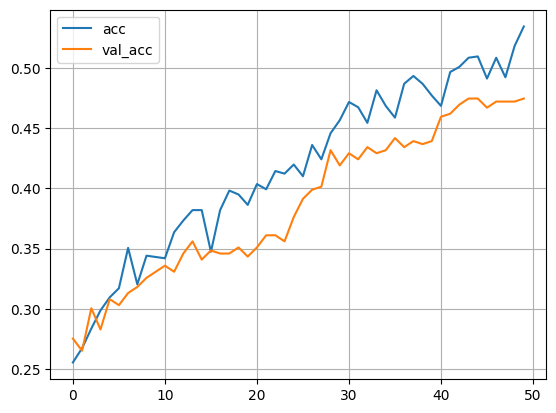

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4800 - loss: 1.1257 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.04 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9787652962441911
r2_score in Simulation Failt  void  for Each Blade :  0.9893246883437121
Error in Simulation Fault for Each Blade :  -0.3188743801388585  --- r2_score Fault S ----  0.9890291789296046
Error in Simulation Fault T  for Each Blade :  -0.3188743801388585  --- r2_score Fault T :  0.9815446500848374
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9855130274441001
r2_score in Simulation Failt  void  for Each Blade :  0.9820982845026944
Error in Simulation Fault for Each Blade :  2.707217727548469  --- r2_score Fault S ----  0.96050472563604
Error in Simulation Fault T  for Each Blade :  2.707217727548469  --- r2_score Fault T :  0.9905339820171889
 ----- for each Blade Simulated ----- 
r2_scor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.32575757575757575
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.2390 - loss: 1.4461 - val_acc: 0.2727 - val_loss: 1.3994
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2666 - loss: 1.4041 - val_acc: 0.2854 - val_loss: 1.3910
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2809 - loss: 1.3836 - val_acc: 0.2778 - val_loss: 1.3870
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2804 - loss: 1.3840 - val_acc: 0.2727 - val_loss: 1.3854
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2879 - loss: 1.3767 - val_acc: 0.2626 - val_loss: 1.3833
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3125 - loss: 1.3564 - val_acc: 0.2626 - val_loss: 1.3817
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3409 - loss: 1.3551 - val_acc: 0.2677 - val_loss: 1.3809
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3122 - loss: 1.3619 - val_acc: 0.2601 - val_loss: 1.3793
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3559 - loss: 1.3399 - v

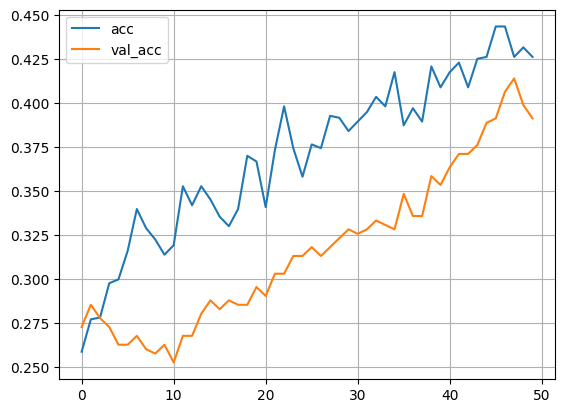

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3712 - loss: 1.2397 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.04 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9843062573446192
r2_score in Simulation Failt  void  for Each Blade :  0.975108833226304
Error in Simulation Fault for Each Blade :  -0.4533584886930777  --- r2_score Fault S ----  0.9891416968789497
Error in Simulation Fault T  for Each Blade :  -0.4533584886930777  --- r2_score Fault T :  0.983772648534092
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9779775031582529
r2_score in Simulation Failt  void  for Each Blade :  0.967768713481201
Error in Simulation Fault for Each Blade :  2.236959023740146  --- r2_score Fault S ----  0.9647643053580413
Error in Simulation Fault T  for Each Blade :  2.236959023740146  --- r2_score Fault T :  0.9813509251689907
 ----- for each Blade Simulated ----- 
r2_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.36363636363636365
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.2800 - loss: 1.4713 - val_acc: 0.3005 - val_loss: 1.3891
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3097 - loss: 1.3898 - val_acc: 0.3207 - val_loss: 1.3739
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2849 - loss: 1.3849 - val_acc: 0.3182 - val_loss: 1.3688
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3314 - loss: 1.3648 - val_acc: 0.3308 - val_loss: 1.3640
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3127 - loss: 1.3553 - val_acc: 0.3384 - val_loss: 1.3612
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3124 - loss: 1.3668 - val_acc: 0.3409 - val_loss: 1.3568
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3233 - loss: 1.3561 - val_acc: 0.3333 - val_loss: 1.3543
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3293 - loss: 1.3397 - val_acc: 0.3157 - val_loss: 1.3525
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3359 - loss: 1.3398 - v

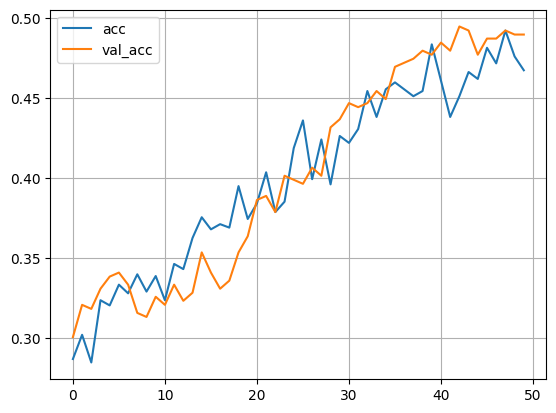

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4683 - loss: 1.1173 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.041 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9932135575078117
r2_score in Simulation Failt  void  for Each Blade :  0.9927057383421037
Error in Simulation Fault for Each Blade :  -0.19424388238811297  --- r2_score Fault S ----  0.9909990353980983
Error in Simulation Fault T  for Each Blade :  -0.19424388238811297  --- r2_score Fault T :  0.9853632329429926
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9787753466663878
r2_score in Simulation Failt  void  for Each Blade :  0.9855453158111968
Error in Simulation Fault for Each Blade :  1.1318298721161404  --- r2_score Fault S ----  0.9846571115052776
Error in Simulation Fault T  for Each Blade :  1.1318298721161404  --- r2_score Fault T :  0.9875204897638078
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.37626262626262624
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.2903 - loss: 1.4312 - val_acc: 0.2854 - val_loss: 1.4042
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3118 - loss: 1.3843 - val_acc: 0.2929 - val_loss: 1.3925
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3019 - loss: 1.3918 - val_acc: 0.3030 - val_loss: 1.3856
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3042 - loss: 1.3809 - val_acc: 0.2929 - val_loss: 1.3818
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3413 - loss: 1.3661 - val_acc: 0.2854 - val_loss: 1.3786
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3295 - loss: 1.3636 - val_acc: 0.3030 - val_loss: 1.3753
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3547 - loss: 1.3469 - val_acc: 0.3207 - val_loss: 1.3709
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3515 - loss: 1.3491 - val_acc: 0.3182 - val_loss: 1.3673
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3565 - loss: 1.3476 - v

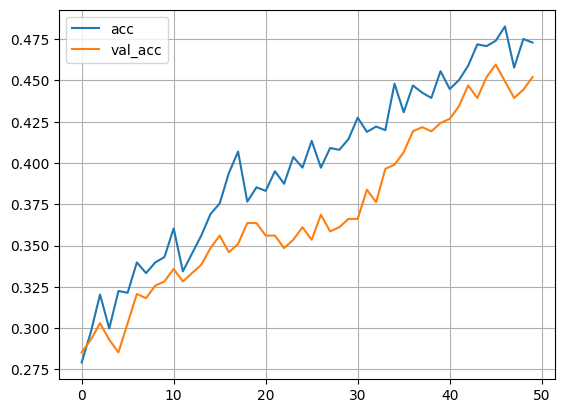

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4656 - loss: 1.1210 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.041 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9694722772350967
r2_score in Simulation Failt  void  for Each Blade :  0.9827935459200189
Error in Simulation Fault for Each Blade :  -0.5779645340314894  --- r2_score Fault S ----  0.9819312400650619
Error in Simulation Fault T  for Each Blade :  -0.5779645340314894  --- r2_score Fault T :  0.9789950067772398
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9804808381403949
r2_score in Simulation Failt  void  for Each Blade :  0.9520050369050854
Error in Simulation Fault for Each Blade :  0.523927874624516  --- r2_score Fault S ----  0.9724111807261706
Error in Simulation Fault T  for Each Blade :  0.523927874624516  --- r2_score Fault T :  0.98040459448045
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3560606060606061
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2501 - loss: 1.4206 - val_acc: 0.2803 - val_loss: 1.4044
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3027 - loss: 1.4108 - val_acc: 0.2576 - val_loss: 1.3965
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2886 - loss: 1.3931 - val_acc: 0.2727 - val_loss: 1.3946
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2783 - loss: 1.3829 - val_acc: 0.2803 - val_loss: 1.3948
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3113 - loss: 1.3683 - val_acc: 0.2904 - val_loss: 1.3927
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3195 - loss: 1.3612 - val_acc: 0.2778 - val_loss: 1.3910
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3297 - loss: 1.3554 - val_acc: 0.2803 - val_loss: 1.3891
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3233 - loss: 1.3682 - val_acc: 0.2803 - val_loss: 1.3862
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3325 - loss: 1.3653 - v

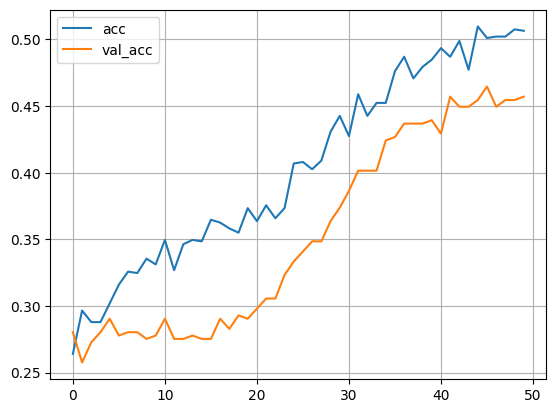

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4383 - loss: 1.1164 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.041 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9777431568036364
r2_score in Simulation Failt  void  for Each Blade :  0.9728594501653347
Error in Simulation Fault for Each Blade :  -2.7822952446092812  --- r2_score Fault S ----  0.9578514203614825
Error in Simulation Fault T  for Each Blade :  -2.7822952446092812  --- r2_score Fault T :  0.9722726954902963
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9843682419930737
r2_score in Simulation Failt  void  for Each Blade :  0.9944365554546256
Error in Simulation Fault for Each Blade :  -1.9327036158030975  --- r2_score Fault S ----  0.9817232348585605
Error in Simulation Fault T  for Each Blade :  -1.9327036158030975  --- r2_score Fault T :  0.9859861276398786
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.30303030303030304
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2757 - loss: 1.4706 - val_acc: 0.2854 - val_loss: 1.3910
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2425 - loss: 1.4161 - val_acc: 0.2955 - val_loss: 1.3791
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2530 - loss: 1.3918 - val_acc: 0.3106 - val_loss: 1.3748
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3271 - loss: 1.3694 - val_acc: 0.3081 - val_loss: 1.3718
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3014 - loss: 1.3631 - val_acc: 0.3030 - val_loss: 1.3685
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3503 - loss: 1.3504 - val_acc: 0.3056 - val_loss: 1.3679
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3321 - loss: 1.3380 - val_acc: 0.3081 - val_loss: 1.3653
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3524 - loss: 1.3370 - val_acc: 0.3157 - val_loss: 1.3647
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3647 - loss: 1.3242 - v

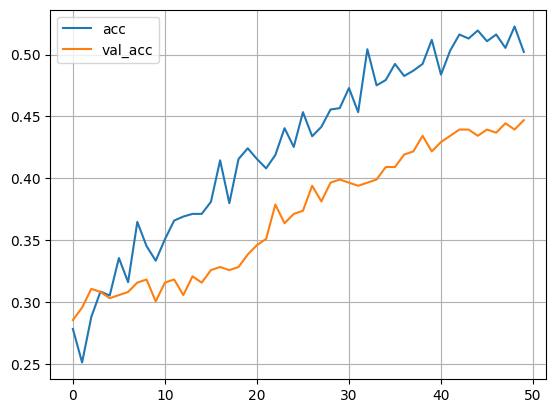

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4519 - loss: 1.0651 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.041 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9797097083821199
r2_score in Simulation Failt  void  for Each Blade :  0.9814795926183061
Error in Simulation Fault for Each Blade :  0.3883689454288006  --- r2_score Fault S ----  0.9733779315582667
Error in Simulation Fault T  for Each Blade :  0.3883689454288006  --- r2_score Fault T :  0.9680351870439149
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9805956761701405
r2_score in Simulation Failt  void  for Each Blade :  0.9822839815154589
Error in Simulation Fault for Each Blade :  0.1551114576535797  --- r2_score Fault S ----  0.9649099613785839
Error in Simulation Fault T  for Each Blade :  0.1551114576535797  --- r2_score Fault T :  0.9668459023006983
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.38636363636363635
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.2548 - loss: 1.4401 - val_acc: 0.2576 - val_loss: 1.4176
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2846 - loss: 1.3974 - val_acc: 0.2778 - val_loss: 1.3940
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3393 - loss: 1.3645 - val_acc: 0.2904 - val_loss: 1.3845
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3260 - loss: 1.3688 - val_acc: 0.2904 - val_loss: 1.3750
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3361 - loss: 1.3626 - val_acc: 0.3131 - val_loss: 1.3684
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3055 - loss: 1.3618 - val_acc: 0.3283 - val_loss: 1.3637
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3603 - loss: 1.3348 - val_acc: 0.3106 - val_loss: 1.3586
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2995 - loss: 1.3443 - val_acc: 0.3106 - val_loss: 1.3531
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3287 - loss: 1.3433 - v

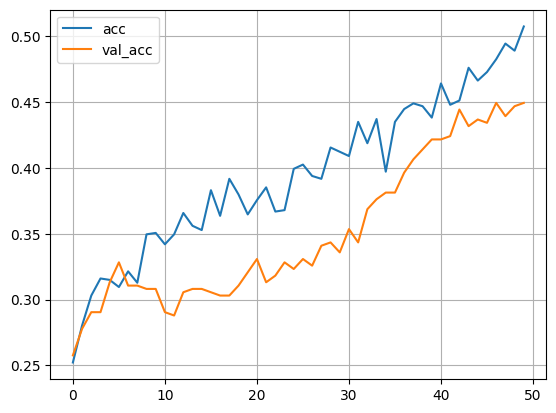

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4447 - loss: 1.1399 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.042 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9937195164695142
r2_score in Simulation Failt  void  for Each Blade :  0.987267404636402
Error in Simulation Fault for Each Blade :  -0.025490004274641542  --- r2_score Fault S ----  0.9877246814672849
Error in Simulation Fault T  for Each Blade :  -0.025490004274641542  --- r2_score Fault T :  0.9734839038647523
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9763504751354932
r2_score in Simulation Failt  void  for Each Blade :  0.9771081835517699
Error in Simulation Fault for Each Blade :  0.30537873076769184  --- r2_score Fault S ----  0.9753954706892726
Error in Simulation Fault T  for Each Blade :  0.30537873076769184  --- r2_score Fault T :  0.9905542337920805
 ----- for each Blade Simulated ----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3409090909090909
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2287 - loss: 1.5257 - val_acc: 0.2348 - val_loss: 1.4251
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2436 - loss: 1.4387 - val_acc: 0.2374 - val_loss: 1.3956
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2513 - loss: 1.4239 - val_acc: 0.3005 - val_loss: 1.3833
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2868 - loss: 1.3937 - val_acc: 0.3157 - val_loss: 1.3729
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2858 - loss: 1.3783 - val_acc: 0.3232 - val_loss: 1.3657
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3344 - loss: 1.3513 - val_acc: 0.3182 - val_loss: 1.3646
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3410 - loss: 1.3476 - val_acc: 0.3258 - val_loss: 1.3596
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3114 - loss: 1.3474 - val_acc: 0.3283 - val_loss: 1.3564
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3338 - loss: 1.3306 - v

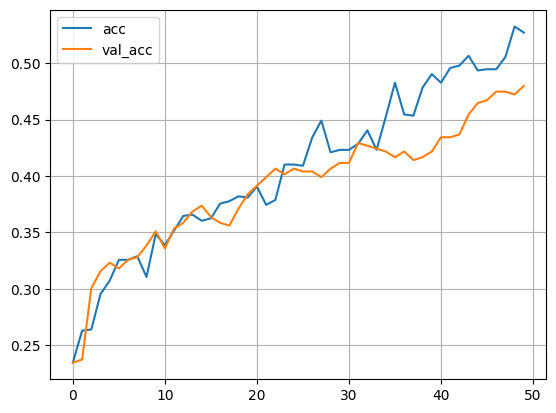

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4468 - loss: 1.1480 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.042 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9850056767914709
r2_score in Simulation Failt  void  for Each Blade :  0.9846638994903715
Error in Simulation Fault for Each Blade :  0.5371340785400895  --- r2_score Fault S ----  0.9861346638251354
Error in Simulation Fault T  for Each Blade :  0.5371340785400895  --- r2_score Fault T :  0.9891166473819153
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.954291575952169
r2_score in Simulation Failt  void  for Each Blade :  0.9732781070040478
Error in Simulation Fault for Each Blade :  -0.2663197961635295  --- r2_score Fault S ----  0.983332401944528
Error in Simulation Fault T  for Each Blade :  -0.2663197961635295  --- r2_score Fault T :  0.9822226290138794
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3409090909090909
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2740 - loss: 1.4116 - val_acc: 0.2348 - val_loss: 1.4061
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2542 - loss: 1.3986 - val_acc: 0.2475 - val_loss: 1.3963
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2773 - loss: 1.3852 - val_acc: 0.2576 - val_loss: 1.3920
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2705 - loss: 1.3809 - val_acc: 0.2677 - val_loss: 1.3890
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3325 - loss: 1.3653 - val_acc: 0.2601 - val_loss: 1.3869
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2781 - loss: 1.3807 - val_acc: 0.2677 - val_loss: 1.3854
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3122 - loss: 1.3705 - val_acc: 0.2803 - val_loss: 1.3842
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3196 - loss: 1.3630 - val_acc: 0.2980 - val_loss: 1.3834
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3315 - loss: 1.3560 - v

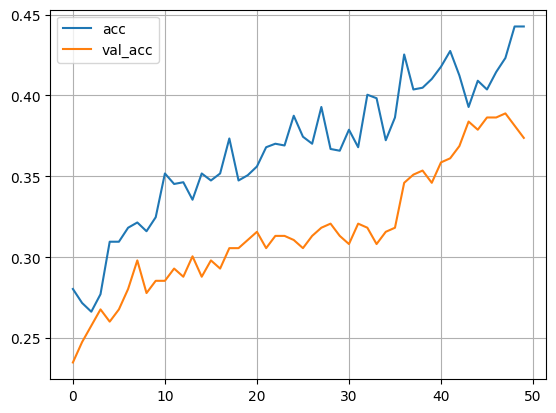

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3886 - loss: 1.2448 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.042 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9855096638987203
r2_score in Simulation Failt  void  for Each Blade :  0.9819462176673975
Error in Simulation Fault for Each Blade :  -0.34291653089167706  --- r2_score Fault S ----  0.9871327281006808
Error in Simulation Fault T  for Each Blade :  -0.34291653089167706  --- r2_score Fault T :  0.9736174994811816
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.974259421381203
r2_score in Simulation Failt  void  for Each Blade :  0.968226502266417
Error in Simulation Fault for Each Blade :  -0.3347937128129801  --- r2_score Fault S ----  0.9790528465896403
Error in Simulation Fault T  for Each Blade :  -0.3347937128129801  --- r2_score Fault T :  0.9844088933802931
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.33585858585858586
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2570 - loss: 1.4648 - val_acc: 0.2854 - val_loss: 1.3903
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2917 - loss: 1.4117 - val_acc: 0.2980 - val_loss: 1.3767
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3162 - loss: 1.3764 - val_acc: 0.3106 - val_loss: 1.3701
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2880 - loss: 1.3801 - val_acc: 0.3283 - val_loss: 1.3645
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3122 - loss: 1.3724 - val_acc: 0.3283 - val_loss: 1.3602
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2968 - loss: 1.3731 - val_acc: 0.3258 - val_loss: 1.3577
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3206 - loss: 1.3642 - val_acc: 0.3283 - val_loss: 1.3561
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3240 - loss: 1.3568 - val_acc: 0.3258 - val_loss: 1.3542
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3244 - loss: 1.3366 - v

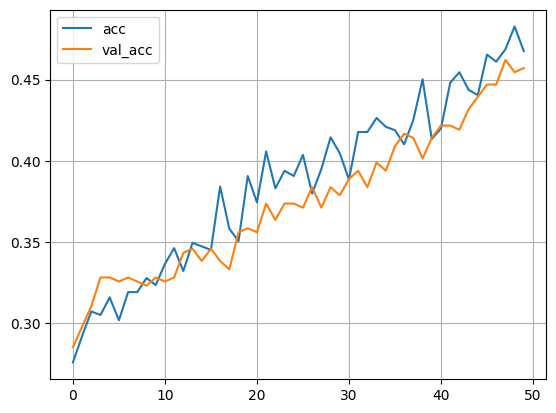

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4895 - loss: 1.1400 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.042 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9720399775272206
r2_score in Simulation Failt  void  for Each Blade :  0.9852178381164285
Error in Simulation Fault for Each Blade :  0.464115504277693  --- r2_score Fault S ----  0.9827551451550152
Error in Simulation Fault T  for Each Blade :  0.464115504277693  --- r2_score Fault T :  0.9685430967549619
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9926327860945234
r2_score in Simulation Failt  void  for Each Blade :  0.9893311756737175
Error in Simulation Fault for Each Blade :  2.600606109748651  --- r2_score Fault S ----  0.9628115990286475
Error in Simulation Fault T  for Each Blade :  2.600606109748651  --- r2_score Fault T :  0.9720583514840202
 ----- for each Blade Simulated ----- 
r2_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3939393939393939
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2657 - loss: 1.4758 - val_acc: 0.2298 - val_loss: 1.4490
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2551 - loss: 1.4318 - val_acc: 0.2424 - val_loss: 1.4161
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3050 - loss: 1.4014 - val_acc: 0.2551 - val_loss: 1.3982
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2875 - loss: 1.3859 - val_acc: 0.2601 - val_loss: 1.3882
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3000 - loss: 1.3761 - val_acc: 0.2525 - val_loss: 1.3828
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3146 - loss: 1.3543 - val_acc: 0.2576 - val_loss: 1.3796
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3446 - loss: 1.3361 - val_acc: 0.2576 - val_loss: 1.3760
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3112 - loss: 1.3453 - val_acc: 0.2576 - val_loss: 1.3735
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3221 - loss: 1.3522 - v

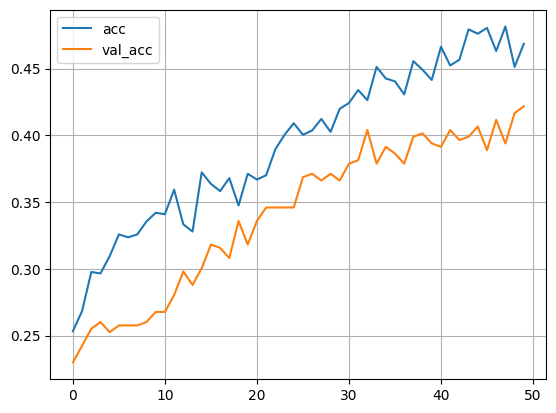

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4139 - loss: 1.1765 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.043 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9778012573948389
r2_score in Simulation Failt  void  for Each Blade :  0.9973802582548321
Error in Simulation Fault for Each Blade :  -0.3431677719863515  --- r2_score Fault S ----  0.9812415179332595
Error in Simulation Fault T  for Each Blade :  -0.3431677719863515  --- r2_score Fault T :  0.9697513988096366
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9807579869979015
r2_score in Simulation Failt  void  for Each Blade :  0.9829814012363259
Error in Simulation Fault for Each Blade :  0.9626794535396521  --- r2_score Fault S ----  0.9755155119249836
Error in Simulation Fault T  for Each Blade :  0.9626794535396521  --- r2_score Fault T :  0.9646398838714544
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3838383838383838
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.2539 - loss: 1.4495 - val_acc: 0.2955 - val_loss: 1.3826
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3093 - loss: 1.3962 - val_acc: 0.3131 - val_loss: 1.3703
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.2917 - loss: 1.3763 - val_acc: 0.3258 - val_loss: 1.3659
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3499 - loss: 1.3593 - val_acc: 0.3359 - val_loss: 1.3591
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3154 - loss: 1.3687 - val_acc: 0.3611 - val_loss: 1.3552
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3140 - loss: 1.3646 - val_acc: 0.3535 - val_loss: 1.3493
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3631 - loss: 1.3596 - val_acc: 0.3409 - val_loss: 1.3437
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3630 - loss: 1.3260 - val_acc: 0.3384 - val_loss: 1.3399
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3359 - loss: 1.3426 - 

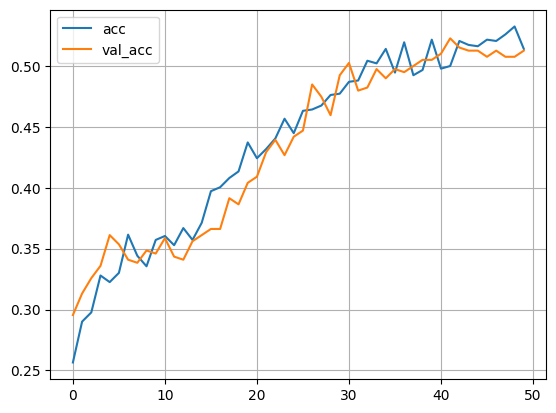

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4801 - loss: 1.0409 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.043 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9790543590594781
r2_score in Simulation Failt  void  for Each Blade :  0.9734009071117442
Error in Simulation Fault for Each Blade :  -0.8626445592978924  --- r2_score Fault S ----  0.9819428302112756
Error in Simulation Fault T  for Each Blade :  -0.8626445592978924  --- r2_score Fault T :  0.9777317620309904
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9878312766513933
r2_score in Simulation Failt  void  for Each Blade :  0.9811427621011986
Error in Simulation Fault for Each Blade :  -1.2129208963237983  --- r2_score Fault S ----  0.980836523934528
Error in Simulation Fault T  for Each Blade :  -1.2129208963237983  --- r2_score Fault T :  0.9798500216439557
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3813131313131313
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.2464 - loss: 1.5391 - val_acc: 0.2172 - val_loss: 1.4323
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2784 - loss: 1.4495 - val_acc: 0.2146 - val_loss: 1.4029
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2967 - loss: 1.4031 - val_acc: 0.2500 - val_loss: 1.3923
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.2697 - loss: 1.3931 - val_acc: 0.2576 - val_loss: 1.3889
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2812 - loss: 1.3951 - val_acc: 0.2803 - val_loss: 1.3856
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2495 - loss: 1.3994 - val_acc: 0.2980 - val_loss: 1.3811
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2894 - loss: 1.3785 - val_acc: 0.3207 - val_loss: 1.3781
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3057 - loss: 1.3656 - val_acc: 0.3207 - val_loss: 1.3732
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3224 - loss: 1.3646 - v

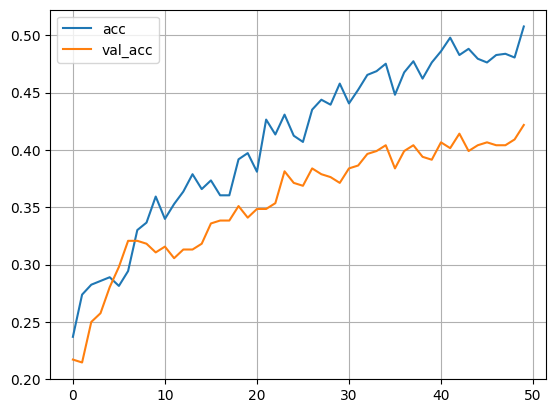

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4096 - loss: 1.1378 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.043 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9941233286771678
r2_score in Simulation Failt  void  for Each Blade :  0.9783641491163462
Error in Simulation Fault for Each Blade :  0.6693102591922591  --- r2_score Fault S ----  0.9841483157540999
Error in Simulation Fault T  for Each Blade :  0.6693102591922591  --- r2_score Fault T :  0.9781492866494244
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9682270136736161
r2_score in Simulation Failt  void  for Each Blade :  0.9837193396356176
Error in Simulation Fault for Each Blade :  0.23209817458754523  --- r2_score Fault S ----  0.9797647051562928
Error in Simulation Fault T  for Each Blade :  0.23209817458754523  --- r2_score Fault T :  0.9824115682684128
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3611111111111111
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2803 - loss: 1.4318 - val_acc: 0.2727 - val_loss: 1.3858
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2655 - loss: 1.4023 - val_acc: 0.3056 - val_loss: 1.3671
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2806 - loss: 1.3783 - val_acc: 0.3232 - val_loss: 1.3536
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2721 - loss: 1.3748 - val_acc: 0.3157 - val_loss: 1.3448
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3233 - loss: 1.3575 - val_acc: 0.3157 - val_loss: 1.3388
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3213 - loss: 1.3588 - val_acc: 0.3232 - val_loss: 1.3354
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3332 - loss: 1.3463 - val_acc: 0.3157 - val_loss: 1.3316
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3397 - loss: 1.3255 - val_acc: 0.3232 - val_loss: 1.3280
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3582 - loss: 1.3310 - v

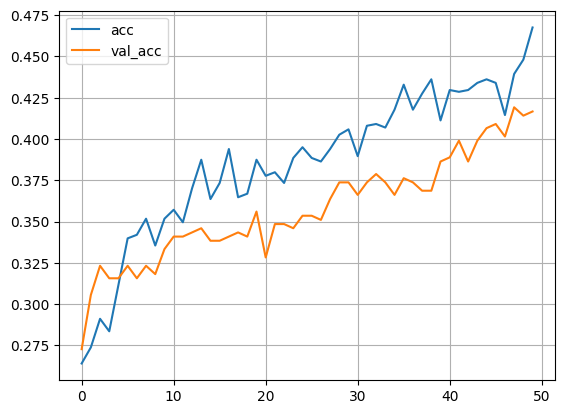

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4332 - loss: 1.2242 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.043 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9908390366735517
r2_score in Simulation Failt  void  for Each Blade :  0.9904124714144534
Error in Simulation Fault for Each Blade :  -0.8884331771956682  --- r2_score Fault S ----  0.9793419462501681
Error in Simulation Fault T  for Each Blade :  -0.8884331771956682  --- r2_score Fault T :  0.9892441618223382
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9871229670923349
r2_score in Simulation Failt  void  for Each Blade :  0.9870742332603029
Error in Simulation Fault for Each Blade :  1.4232191791832505  --- r2_score Fault S ----  0.981211892160325
Error in Simulation Fault T  for Each Blade :  1.4232191791832505  --- r2_score Fault T :  0.9661479174707012
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.37626262626262624
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.2445 - loss: 1.3968 - val_acc: 0.2904 - val_loss: 1.3786
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2969 - loss: 1.3699 - val_acc: 0.2879 - val_loss: 1.3647
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3485 - loss: 1.3507 - val_acc: 0.3384 - val_loss: 1.3536
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3645 - loss: 1.3283 - val_acc: 0.3460 - val_loss: 1.3449
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3753 - loss: 1.3202 - val_acc: 0.3460 - val_loss: 1.3393
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3634 - loss: 1.3187 - val_acc: 0.3485 - val_loss: 1.3343
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.3657 - loss: 1.2986 - val_acc: 0.3611 - val_loss: 1.3267
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3594 - loss: 1.3065 - val_acc: 0.3737 - val_loss: 1.3217
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3689 - loss: 1.3160 - 

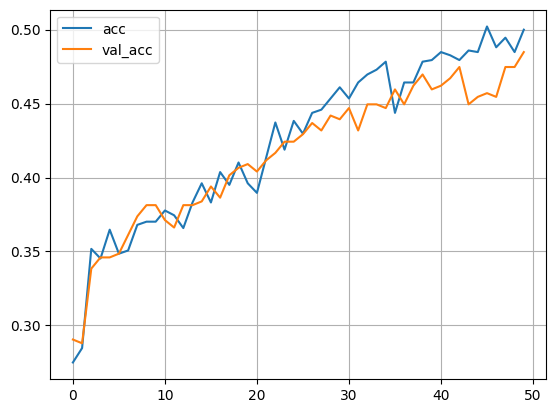

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5395 - loss: 1.0712 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.044 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9841210448360566
r2_score in Simulation Failt  void  for Each Blade :  0.963861740212141
Error in Simulation Fault for Each Blade :  -0.829716257798482  --- r2_score Fault S ----  0.982719148420175
Error in Simulation Fault T  for Each Blade :  -0.829716257798482  --- r2_score Fault T :  0.9724047978379541
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9849954710412856
r2_score in Simulation Failt  void  for Each Blade :  0.9916184894076454
Error in Simulation Fault for Each Blade :  0.450219509775019  --- r2_score Fault S ----  0.9867768314511992
Error in Simulation Fault T  for Each Blade :  0.450219509775019  --- r2_score Fault T :  0.9838730922616681
 ----- for each Blade Simulated ----- 
r2_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.351010101010101
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.2725 - loss: 1.4734 - val_acc: 0.2449 - val_loss: 1.4031
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2922 - loss: 1.3888 - val_acc: 0.2904 - val_loss: 1.3701
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2976 - loss: 1.3733 - val_acc: 0.2980 - val_loss: 1.3570
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3521 - loss: 1.3454 - val_acc: 0.3030 - val_loss: 1.3485
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3273 - loss: 1.3341 - val_acc: 0.3056 - val_loss: 1.3423
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3003 - loss: 1.3468 - val_acc: 0.3081 - val_loss: 1.3380
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3274 - loss: 1.3503 - val_acc: 0.3106 - val_loss: 1.3345
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3541 - loss: 1.3237 - val_acc: 0.3030 - val_loss: 1.3311
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3416 - loss: 1.3379 - v

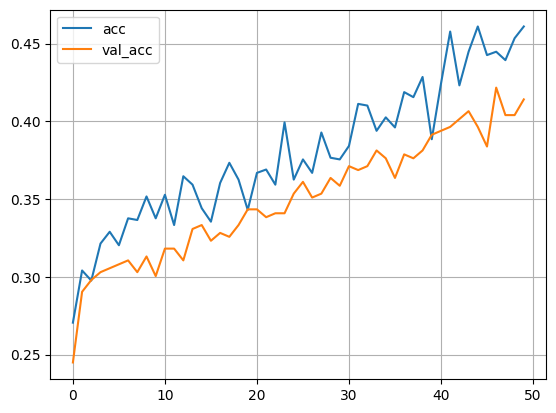

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4228 - loss: 1.1755 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.044 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9977395060107785
r2_score in Simulation Failt  void  for Each Blade :  0.9856078836740145
Error in Simulation Fault for Each Blade :  -2.7031106981220985  --- r2_score Fault S ----  0.9756759640152097
Error in Simulation Fault T  for Each Blade :  -2.7031106981220985  --- r2_score Fault T :  0.9835625915329017
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9888262699920285
r2_score in Simulation Failt  void  for Each Blade :  0.9781600394373566
Error in Simulation Fault for Each Blade :  -0.10546856306492591  --- r2_score Fault S ----  0.975568821160888
Error in Simulation Fault T  for Each Blade :  -0.10546856306492591  --- r2_score Fault T :  0.9739931429272413
 ----- for each Blade Simulated ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3712121212121212
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.2305 - loss: 1.4827 - val_acc: 0.2904 - val_loss: 1.4109
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2687 - loss: 1.4230 - val_acc: 0.3056 - val_loss: 1.3925
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2851 - loss: 1.4060 - val_acc: 0.3030 - val_loss: 1.3849
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2998 - loss: 1.3716 - val_acc: 0.2980 - val_loss: 1.3811
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2595 - loss: 1.3821 - val_acc: 0.2955 - val_loss: 1.3771
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3002 - loss: 1.3726 - val_acc: 0.2904 - val_loss: 1.3732
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3306 - loss: 1.3616 - val_acc: 0.2879 - val_loss: 1.3689
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3083 - loss: 1.3616 - val_acc: 0.3258 - val_loss: 1.3622
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3365 - loss: 1.3467 - v

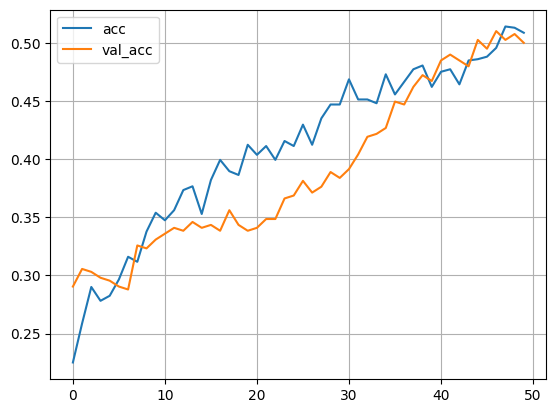

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5060 - loss: 1.0593 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.044 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9912768555269087
r2_score in Simulation Failt  void  for Each Blade :  0.9553995448183844
Error in Simulation Fault for Each Blade :  -0.9466653056684671  --- r2_score Fault S ----  0.991922580406816
Error in Simulation Fault T  for Each Blade :  -0.9466653056684671  --- r2_score Fault T :  0.9700476176788675
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9857530127901722
r2_score in Simulation Failt  void  for Each Blade :  0.9862584561448966
Error in Simulation Fault for Each Blade :  -4.886066316614587  --- r2_score Fault S ----  0.9204516696554897
Error in Simulation Fault T  for Each Blade :  -4.886066316614587  --- r2_score Fault T :  0.9738684727692578
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.33080808080808083
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2760 - loss: 1.4349 - val_acc: 0.2753 - val_loss: 1.4627
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2932 - loss: 1.4259 - val_acc: 0.2955 - val_loss: 1.4347
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3115 - loss: 1.3882 - val_acc: 0.2904 - val_loss: 1.4166
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3100 - loss: 1.3779 - val_acc: 0.2929 - val_loss: 1.4030
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3149 - loss: 1.3711 - val_acc: 0.2955 - val_loss: 1.3955
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3501 - loss: 1.3602 - val_acc: 0.2929 - val_loss: 1.3854
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3126 - loss: 1.3474 - val_acc: 0.3081 - val_loss: 1.3779
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3575 - loss: 1.3400 - val_acc: 0.3182 - val_loss: 1.3691
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3428 - loss: 1.3318 - v

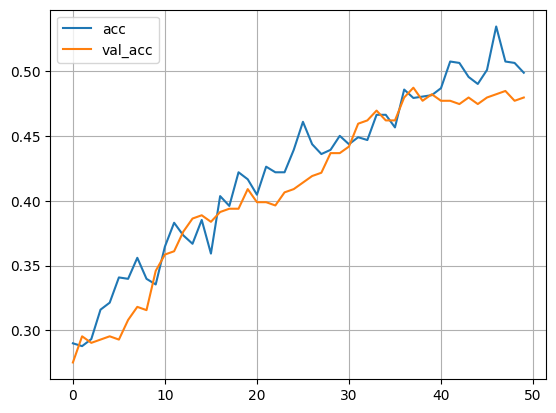

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4821 - loss: 1.0832 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.044 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.988316862407741
r2_score in Simulation Failt  void  for Each Blade :  0.9843761911330753
Error in Simulation Fault for Each Blade :  0.48315476978094396  --- r2_score Fault S ----  0.9904386278131797
Error in Simulation Fault T  for Each Blade :  0.48315476978094396  --- r2_score Fault T :  0.9856117967807325
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9835300916455622
r2_score in Simulation Failt  void  for Each Blade :  0.9863507340721448
Error in Simulation Fault for Each Blade :  0.1318529178962966  --- r2_score Fault S ----  0.9752222176742038
Error in Simulation Fault T  for Each Blade :  0.1318529178962966  --- r2_score Fault T :  0.9656747357275979
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3838383838383838
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.2583 - loss: 1.5224 - val_acc: 0.2601 - val_loss: 1.4258
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3036 - loss: 1.3882 - val_acc: 0.2576 - val_loss: 1.4057
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2924 - loss: 1.3913 - val_acc: 0.2601 - val_loss: 1.3943
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3113 - loss: 1.3689 - val_acc: 0.2727 - val_loss: 1.3889
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3129 - loss: 1.3756 - val_acc: 0.2803 - val_loss: 1.3827
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3427 - loss: 1.3568 - val_acc: 0.2803 - val_loss: 1.3772
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3343 - loss: 1.3616 - val_acc: 0.2702 - val_loss: 1.3714
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3334 - loss: 1.3442 - val_acc: 0.2753 - val_loss: 1.3677
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3056 - loss: 1.3515 - 

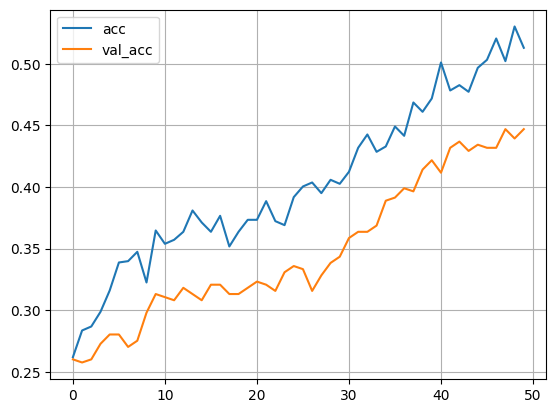

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4489 - loss: 1.0977 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.045 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9552414363067144
r2_score in Simulation Failt  void  for Each Blade :  0.9528872542546017
Error in Simulation Fault for Each Blade :  0.32517864059880863  --- r2_score Fault S ----  0.9916057655029762
Error in Simulation Fault T  for Each Blade :  0.32517864059880863  --- r2_score Fault T :  0.9507876008097844
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9751175579701413
r2_score in Simulation Failt  void  for Each Blade :  0.9853877251661936
Error in Simulation Fault for Each Blade :  1.6114410803920265  --- r2_score Fault S ----  0.9612607110654513
Error in Simulation Fault T  for Each Blade :  1.6114410803920265  --- r2_score Fault T :  0.990645227218732
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3813131313131313
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2187 - loss: 1.4531 - val_acc: 0.2298 - val_loss: 1.4048
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2680 - loss: 1.3995 - val_acc: 0.2500 - val_loss: 1.3872
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2655 - loss: 1.3877 - val_acc: 0.2601 - val_loss: 1.3756
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2857 - loss: 1.3793 - val_acc: 0.2753 - val_loss: 1.3688
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3137 - loss: 1.3616 - val_acc: 0.2778 - val_loss: 1.3627
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3264 - loss: 1.3473 - val_acc: 0.3056 - val_loss: 1.3551
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3014 - loss: 1.3572 - val_acc: 0.3081 - val_loss: 1.3457
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3426 - loss: 1.3405 - val_acc: 0.3106 - val_loss: 1.3416
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3352 - loss: 1.3344 - v

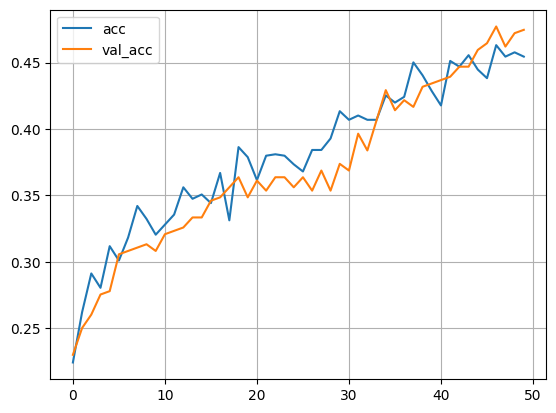

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4724 - loss: 1.1444 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.045 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9711738794482407
r2_score in Simulation Failt  void  for Each Blade :  0.9557499170064319
Error in Simulation Fault for Each Blade :  2.6772039346747567  --- r2_score Fault S ----  0.9732418913027777
Error in Simulation Fault T  for Each Blade :  2.6772039346747567  --- r2_score Fault T :  0.9925237744675995
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9862054959080019
r2_score in Simulation Failt  void  for Each Blade :  0.9625758142178572
Error in Simulation Fault for Each Blade :  -0.172320918472727  --- r2_score Fault S ----  0.9827386985169544
Error in Simulation Fault T  for Each Blade :  -0.172320918472727  --- r2_score Fault T :  0.986662752029824
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3333333333333333
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2634 - loss: 1.4418 - val_acc: 0.2500 - val_loss: 1.4008
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3269 - loss: 1.3887 - val_acc: 0.2727 - val_loss: 1.3867
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3311 - loss: 1.3851 - val_acc: 0.2803 - val_loss: 1.3777
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3336 - loss: 1.3594 - val_acc: 0.2929 - val_loss: 1.3722
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3138 - loss: 1.3551 - val_acc: 0.2955 - val_loss: 1.3686
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3337 - loss: 1.3660 - val_acc: 0.2929 - val_loss: 1.3624
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3618 - loss: 1.3489 - val_acc: 0.2929 - val_loss: 1.3561
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3570 - loss: 1.3281 - val_acc: 0.2980 - val_loss: 1.3504
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3503 - loss: 1.3342 - v

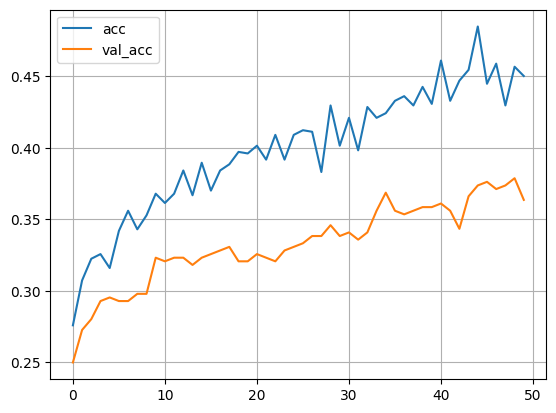

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3417 - loss: 1.2568 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.045 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9783872524771056
r2_score in Simulation Failt  void  for Each Blade :  0.9718494308205923
Error in Simulation Fault for Each Blade :  2.0414531802333435  --- r2_score Fault S ----  0.9853104839314643
Error in Simulation Fault T  for Each Blade :  2.0414531802333435  --- r2_score Fault T :  0.9907156398839662
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9877172189813221
r2_score in Simulation Failt  void  for Each Blade :  0.9786495188492292
Error in Simulation Fault for Each Blade :  0.550824348286906  --- r2_score Fault S ----  0.9812332711203648
Error in Simulation Fault T  for Each Blade :  0.550824348286906  --- r2_score Fault T :  0.984367800686499
 ----- for each Blade Simulated ----- 
r2_scor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3333333333333333
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.2603 - loss: 1.4413 - val_acc: 0.3056 - val_loss: 1.3684
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2512 - loss: 1.3987 - val_acc: 0.3056 - val_loss: 1.3602
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3060 - loss: 1.3737 - val_acc: 0.2929 - val_loss: 1.3542
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3238 - loss: 1.3586 - val_acc: 0.3005 - val_loss: 1.3481
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3009 - loss: 1.3415 - val_acc: 0.3207 - val_loss: 1.3435
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3402 - loss: 1.3299 - val_acc: 0.3081 - val_loss: 1.3401
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3411 - loss: 1.3471 - val_acc: 0.2955 - val_loss: 1.3377
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3614 - loss: 1.3259 - val_acc: 0.3106 - val_loss: 1.3349
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3724 - loss: 1.3190 - v

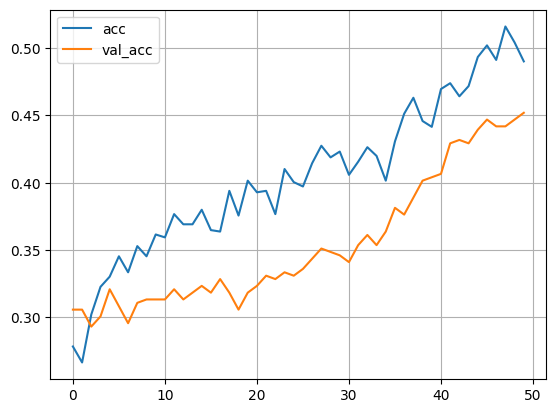

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4499 - loss: 1.0956 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.045 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9539401379566551
r2_score in Simulation Failt  void  for Each Blade :  0.9858874348402988
Error in Simulation Fault for Each Blade :  -1.604243337322677  --- r2_score Fault S ----  0.979137206272939
Error in Simulation Fault T  for Each Blade :  -1.604243337322677  --- r2_score Fault T :  0.9802457737174864
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9696600158451206
r2_score in Simulation Failt  void  for Each Blade :  0.9657963035530164
Error in Simulation Fault for Each Blade :  -0.10432628122903997  --- r2_score Fault S ----  0.9856838088179941
Error in Simulation Fault T  for Each Blade :  -0.10432628122903997  --- r2_score Fault T :  0.9824366784782103
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.40404040404040403
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.2568 - loss: 1.4884 - val_acc: 0.2652 - val_loss: 1.3957
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2813 - loss: 1.3972 - val_acc: 0.2904 - val_loss: 1.3698
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3104 - loss: 1.3783 - val_acc: 0.3106 - val_loss: 1.3602
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2975 - loss: 1.3671 - val_acc: 0.3283 - val_loss: 1.3528
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3523 - loss: 1.3305 - val_acc: 0.3333 - val_loss: 1.3461
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3310 - loss: 1.3437 - val_acc: 0.3434 - val_loss: 1.3412
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3016 - loss: 1.3475 - val_acc: 0.3409 - val_loss: 1.3368
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3303 - loss: 1.3176 - val_acc: 0.3434 - val_loss: 1.3323
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3084 - loss: 1.3313 - v

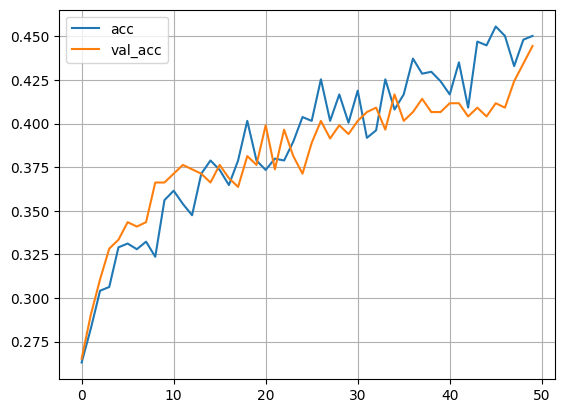

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4601 - loss: 1.2074 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.046 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9808027816125227
r2_score in Simulation Failt  void  for Each Blade :  0.9891182636418689
Error in Simulation Fault for Each Blade :  -0.21095250938424037  --- r2_score Fault S ----  0.9717842576849196
Error in Simulation Fault T  for Each Blade :  -0.21095250938424037  --- r2_score Fault T :  0.9805672505600314
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9886059883661896
r2_score in Simulation Failt  void  for Each Blade :  0.9767527090432437
Error in Simulation Fault for Each Blade :  -0.24962858102364693  --- r2_score Fault S ----  0.9965650787567574
Error in Simulation Fault T  for Each Blade :  -0.24962858102364693  --- r2_score Fault T :  0.9890784276764197
 ----- for each Blade Simulated ---

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.398989898989899
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.2422 - loss: 1.4876 - val_acc: 0.3131 - val_loss: 1.3940
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2629 - loss: 1.4017 - val_acc: 0.3081 - val_loss: 1.3716
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2694 - loss: 1.3899 - val_acc: 0.3359 - val_loss: 1.3606
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2909 - loss: 1.3707 - val_acc: 0.3434 - val_loss: 1.3538
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3430 - loss: 1.3532 - val_acc: 0.3434 - val_loss: 1.3478
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3332 - loss: 1.3462 - val_acc: 0.3535 - val_loss: 1.3403
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3280 - loss: 1.3405 - val_acc: 0.3889 - val_loss: 1.3330
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3222 - loss: 1.3472 - val_acc: 0.3889 - val_loss: 1.3213
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3509 - loss: 1.3328 - v

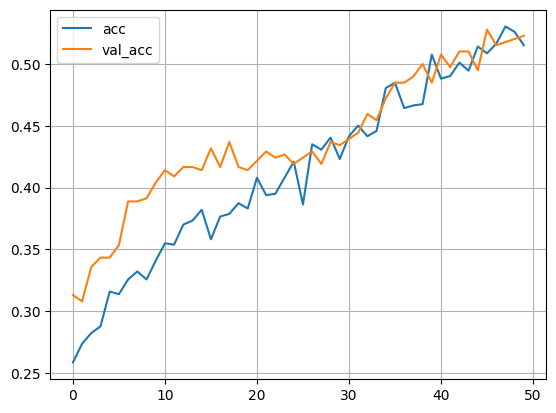

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4957 - loss: 1.0465 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.046 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9705070789580456
r2_score in Simulation Failt  void  for Each Blade :  0.9922548407424207
Error in Simulation Fault for Each Blade :  1.5396097912667717  --- r2_score Fault S ----  0.9713971543366136
Error in Simulation Fault T  for Each Blade :  1.5396097912667717  --- r2_score Fault T :  0.9628489988656337
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9867713184680853
r2_score in Simulation Failt  void  for Each Blade :  0.9937031366974913
Error in Simulation Fault for Each Blade :  -1.0936434288314782  --- r2_score Fault S ----  0.9851378180440553
Error in Simulation Fault T  for Each Blade :  -1.0936434288314782  --- r2_score Fault T :  0.9887455342286785
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3813131313131313
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.2526 - loss: 1.4185 - val_acc: 0.2803 - val_loss: 1.3910
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2835 - loss: 1.3927 - val_acc: 0.2955 - val_loss: 1.3795
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3034 - loss: 1.3770 - val_acc: 0.3157 - val_loss: 1.3738
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3189 - loss: 1.3720 - val_acc: 0.3106 - val_loss: 1.3702
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3260 - loss: 1.3595 - val_acc: 0.3207 - val_loss: 1.3655
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3082 - loss: 1.3617 - val_acc: 0.3258 - val_loss: 1.3619
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3145 - loss: 1.3508 - val_acc: 0.3182 - val_loss: 1.3583
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.3396 - loss: 1.3398 - val_acc: 0.3384 - val_loss: 1.3514
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3540 - loss: 1.3274 - v

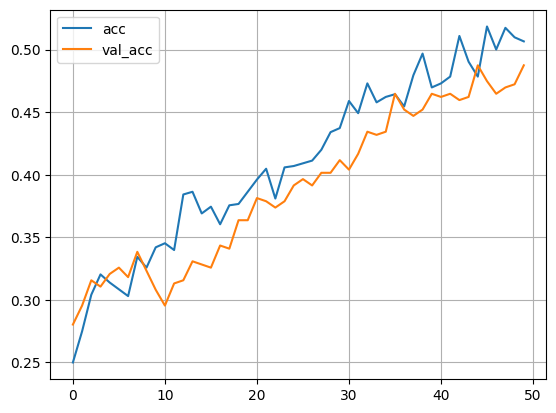

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4734 - loss: 1.0762 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.046 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9815588359834679
r2_score in Simulation Failt  void  for Each Blade :  0.9781424986634651
Error in Simulation Fault for Each Blade :  1.1082226493066902  --- r2_score Fault S ----  0.9756511934148309
Error in Simulation Fault T  for Each Blade :  1.1082226493066902  --- r2_score Fault T :  0.9856234894844228
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.992013258086679
r2_score in Simulation Failt  void  for Each Blade :  0.95020508468192
Error in Simulation Fault for Each Blade :  -0.1825375970325125  --- r2_score Fault S ----  0.9775876832906355
Error in Simulation Fault T  for Each Blade :  -0.1825375970325125  --- r2_score Fault T :  0.990278383634217
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.31565656565656564
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.2623 - loss: 1.4675 - val_acc: 0.2753 - val_loss: 1.3873
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2653 - loss: 1.4018 - val_acc: 0.2778 - val_loss: 1.3703
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3088 - loss: 1.3692 - val_acc: 0.3182 - val_loss: 1.3640
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3299 - loss: 1.3665 - val_acc: 0.3131 - val_loss: 1.3586
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3161 - loss: 1.3585 - val_acc: 0.3182 - val_loss: 1.3535
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3636 - loss: 1.3402 - val_acc: 0.3232 - val_loss: 1.3481
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3444 - loss: 1.3421 - val_acc: 0.3081 - val_loss: 1.3407
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3623 - loss: 1.3424 - val_acc: 0.3207 - val_loss: 1.3357
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3741 - loss: 1.3278 - v

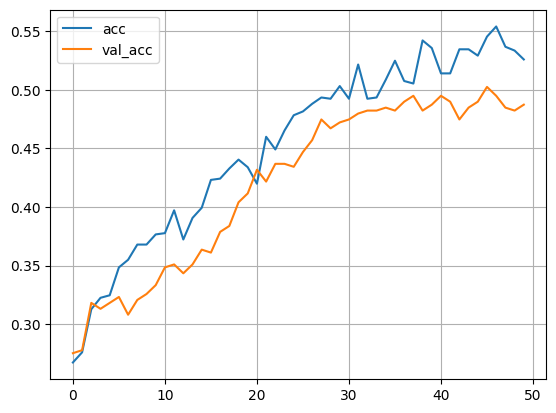

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4724 - loss: 1.0350 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.046 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9758025550023103
r2_score in Simulation Failt  void  for Each Blade :  0.9909145829462283
Error in Simulation Fault for Each Blade :  -0.9611611461639669  --- r2_score Fault S ----  0.9628628115608149
Error in Simulation Fault T  for Each Blade :  -0.9611611461639669  --- r2_score Fault T :  0.9687526331442871
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.978175041421172
r2_score in Simulation Failt  void  for Each Blade :  0.9833295459329849
Error in Simulation Fault for Each Blade :  0.9387867177756193  --- r2_score Fault S ----  0.9818918135814834
Error in Simulation Fault T  for Each Blade :  0.9387867177756193  --- r2_score Fault T :  0.9693519856592596
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.37626262626262624
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

In [ ]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(10):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30     )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 ,  )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 ,  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} , location : {locate}")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.5 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='Fault_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault_t)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault_t),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.title(f"For This  alpha : {iter_alpha} and void : {iter_flat / 10 }  ")
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.3  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")












In [10]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [11]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.8041191198012605  - mean fault :  1.804673792222846  - mean health :  1.745522605282676


<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-12-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

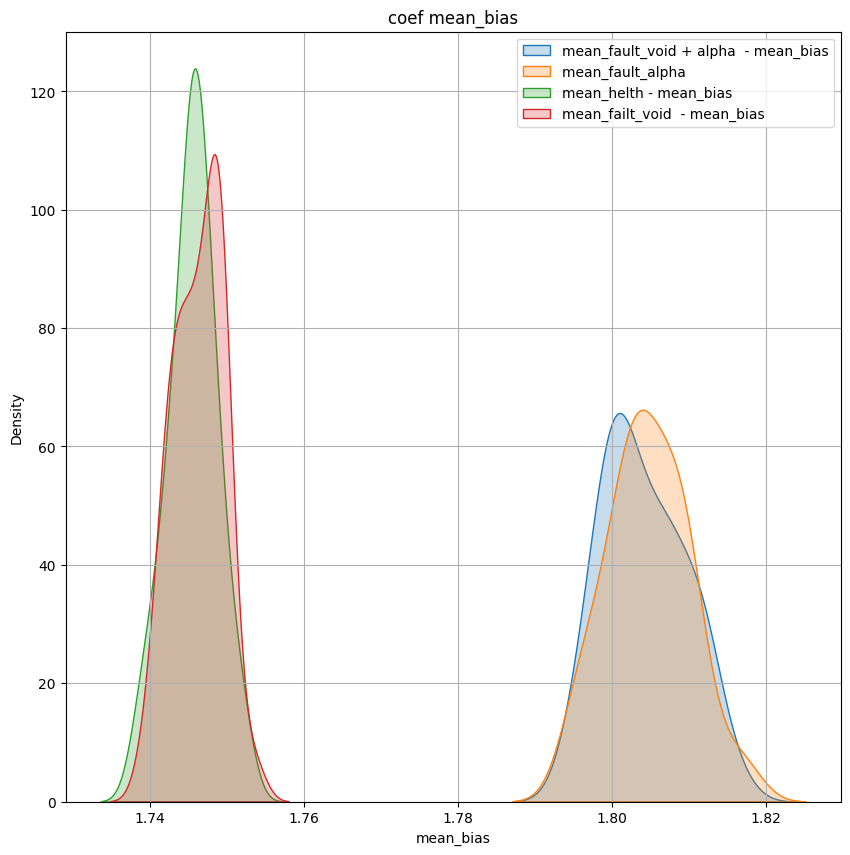

<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


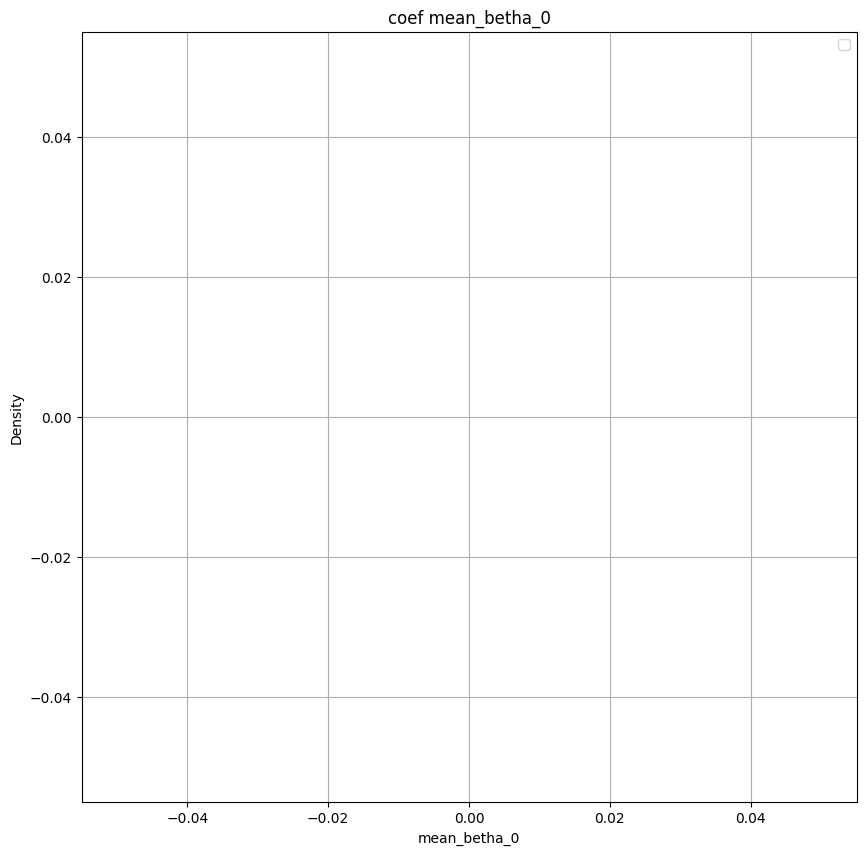

mean fault t :  -1.1534606987469747  - mean fault :  -1.1518133785932754  - mean health :  -1.0558096568126287


<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-12-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

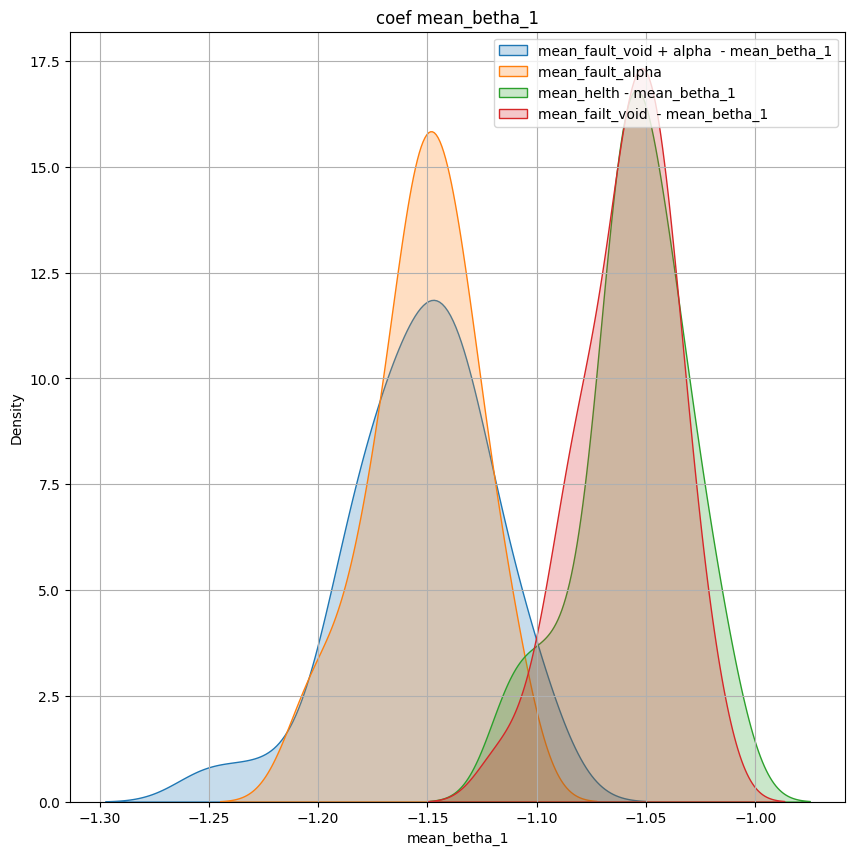

mean fault t :  -0.07643878833976588  - mean fault :  -0.07252917224444203  - mean health :  -0.07157705736166795


<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-12-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

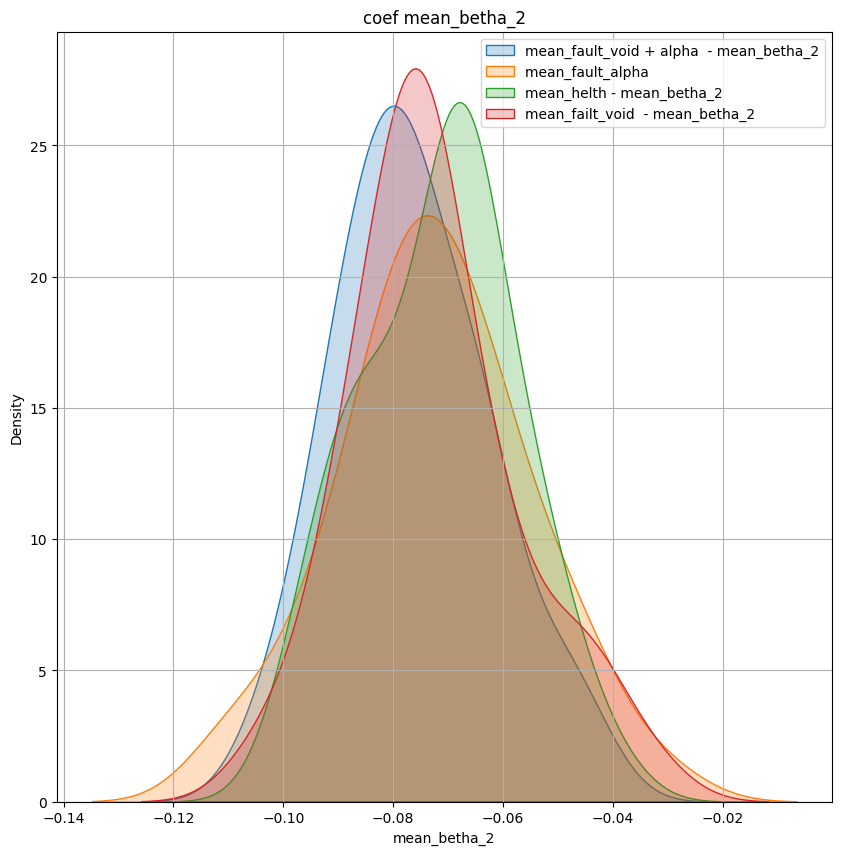

mean fault t :  2.961882267369891  - mean fault :  2.9596875573284107  - mean health :  2.791836450624557


<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-12-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

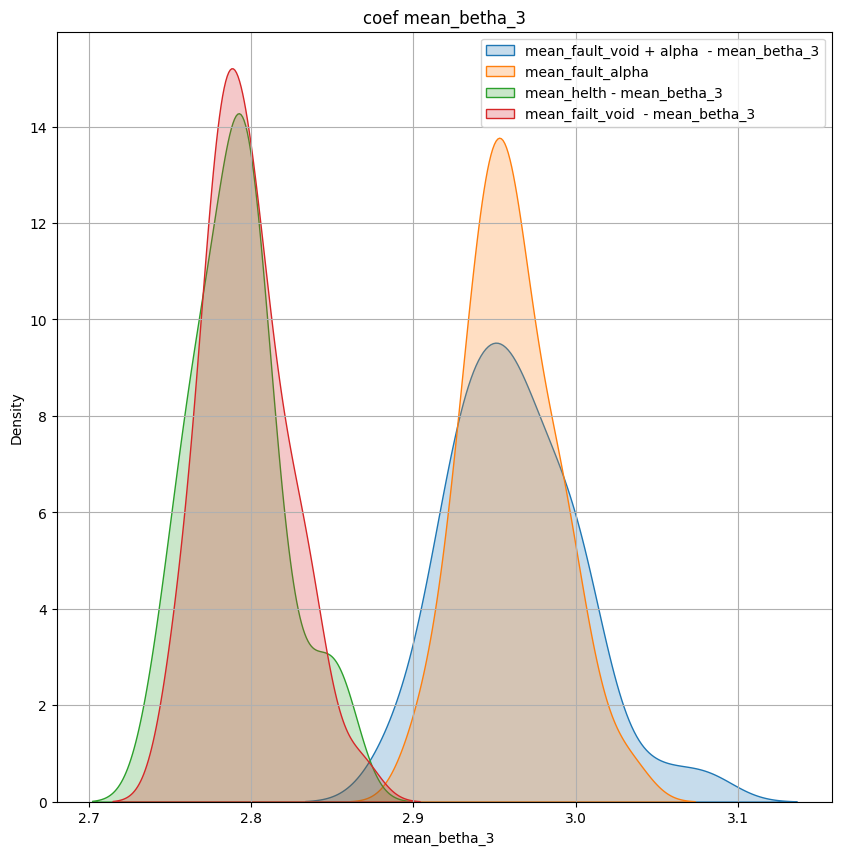

mean fault t :  0.09062500533706247  - mean fault :  0.08896525798170493  - mean health :  0.08556148837760827


<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-12-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

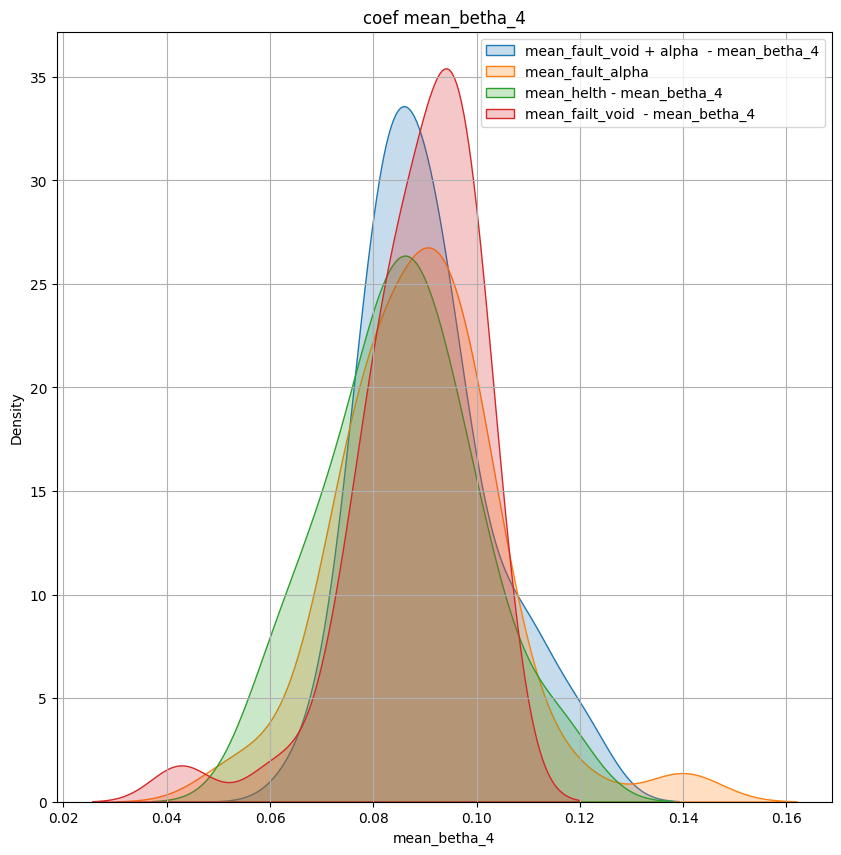

mean fault t :  -0.01641842170032099  - mean fault :  -0.013808903516670907  - mean health :  -0.014846323784742346


<ipython-input-12-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-12-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-12-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-12-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

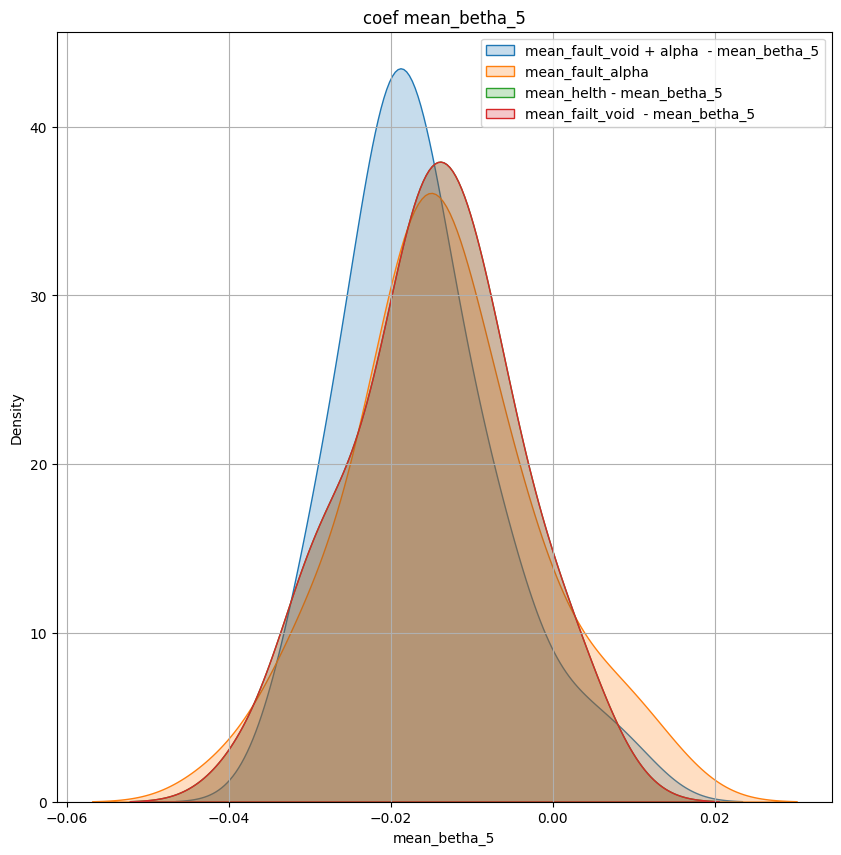

In [12]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [13]:
df_result = pd.DataFrame(total_simulation)


In [14]:
df_result.head(5)

bias_correlation  betha_0_correlation  betha_1_correlation  \
0          0.089577                  NaN            -0.119518   
1          0.086738                  NaN            -0.104656   
2          0.087379                  NaN            -0.128200   
3          0.090203                  NaN            -0.129896   
4          0.091404                  NaN            -0.222035   

   betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0            -0.004873             0.188360            -0.034445   
1            -0.029879             0.176517             0.009473   
2            -0.030838             0.202072             0.034278   
3             0.029226             0.194192            -0.013856   
4             0.051910             0.265149            -0.081465   

   betha_5_correlation  alpha  flap  accuracy_nav  ...  n_estimators_RF  \
0            -0.038153  0.040     1        0.2500  ...              200   
1            -0.020711  0.040     2        0.3000  ...              500   
2            -0.018261  0.040     3        0.2500  ...              200   
3             0.031861  0.040     4        0.2375  ...              200   
4             0.003919  0.041     1        0.2750  ...              200   

   max_features_RF max_depth_RF  criterion_RF accuracy_extra_classifier  \
0             sqrt            6       entropy                    0.3125   
1             sqrt            7          gini                    0.2625   
2             sqrt            7       entropy                    0.3000   
3             sqrt            6       entropy                    0.2625   
4             sqrt            5       entropy                    0.2750   

   accuracy_svc_  C_svc  kernel_svc gamma_svc     ann  
0         0.2875   1000      linear       1.0  0.2375  
1         0.3875     10      linear       1.0  0.2750  
2         0.2875    100      linear       1.0  0.2875  
3         0.3500    100      linear       1.0  0.2625  
4         0.3875    100      linear       1.0  0.3125  

[5 rows x 21 columns]

In [15]:
df_svc_group = df_result.groupby(['alpha' , 'flap' , 'kernel_svc']).agg({'accuracy_svc_' : ['mean'] })

In [16]:
df_svc_group

accuracy_svc_
                               mean
alpha flap kernel_svc              
0.040 1    linear            0.2875
      2    linear            0.3875
      3    linear            0.2875
      4    linear            0.3500
0.041 1    linear            0.3875
      2    rbf               0.2375
      3    linear            0.3375
      4    linear            0.2750
0.042 1    rbf               0.2750
      2    linear            0.3000
      3    linear            0.2250
      4    rbf               0.3000
0.043 1    linear            0.3000
      2    linear            0.3250
      3    linear            0.3375
      4    linear            0.2500
0.044 1    linear            0.2500
      2    rbf               0.3250
      3    linear            0.3000
      4    linear            0.4000
0.045 1    linear            0.3000
      2    linear            0.2375
      3    linear            0.3250
      4    rbf               0.2750
0.046 1    linear            0.3375
      2    rbf               0.2875
      3    linear            0.3000
      4    linear            0.3625
0.047 1    linear            0.3000
      2    rbf               0.1875
      3    rbf               0.2625
      4    linear            0.2625
0.048 1    linear            0.2125
      2    linear            0.2750
      3    linear            0.2750
      4    linear            0.2875
0.049 1    linear            0.3250
      2    linear            0.2625
      3    linear            0.3125
      4    rbf               0.2500

In [17]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

IndexError: single positional indexer is out-of-bounds

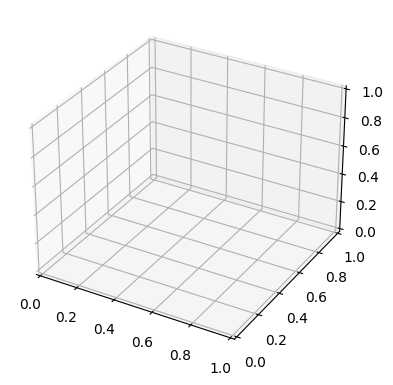

In [18]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

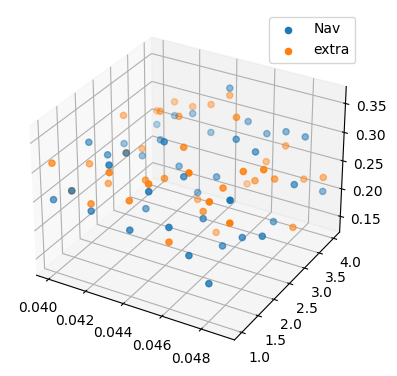

In [19]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

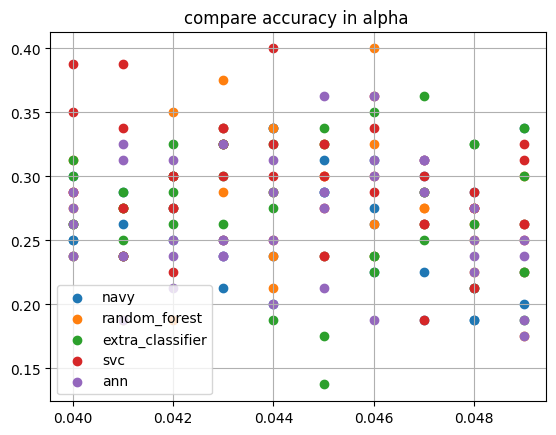

In [20]:
plt.scatter( df_result['alpha'] , df_result['accuracy_nav'] , label = 'navy')
plt.scatter( df_result['alpha'] , df_result['accuracy_random_forest'] , label = 'random_forest')
plt.scatter( df_result['alpha'] , df_result['accuracy_extra_classifier'] , label = 'extra_classifier')
plt.scatter( df_result['alpha'] , df_result['accuracy_svc_'] , label = 'svc')
plt.scatter( df_result['alpha'] , df_result['ann'] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.legend()
plt.grid()
plt.show()

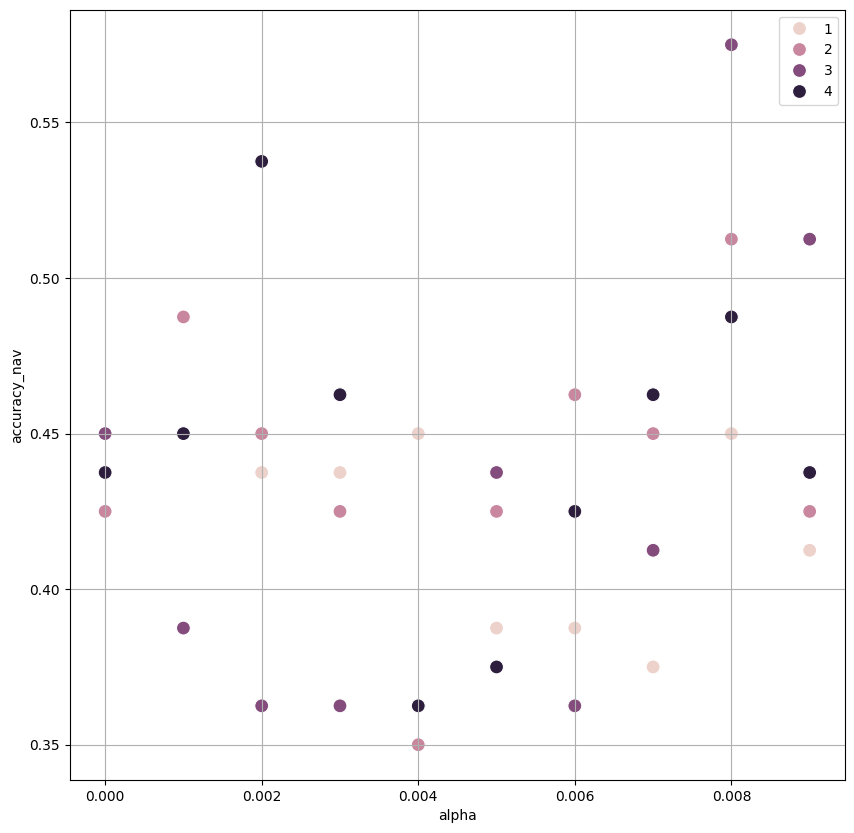

In [ ]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

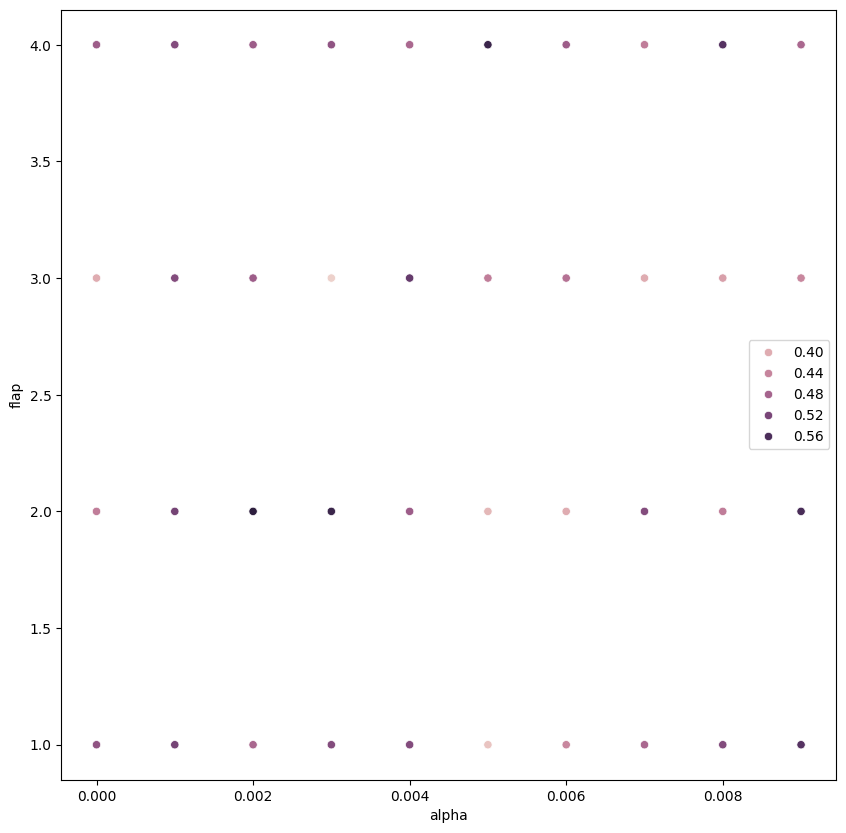

In [ ]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [ ]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

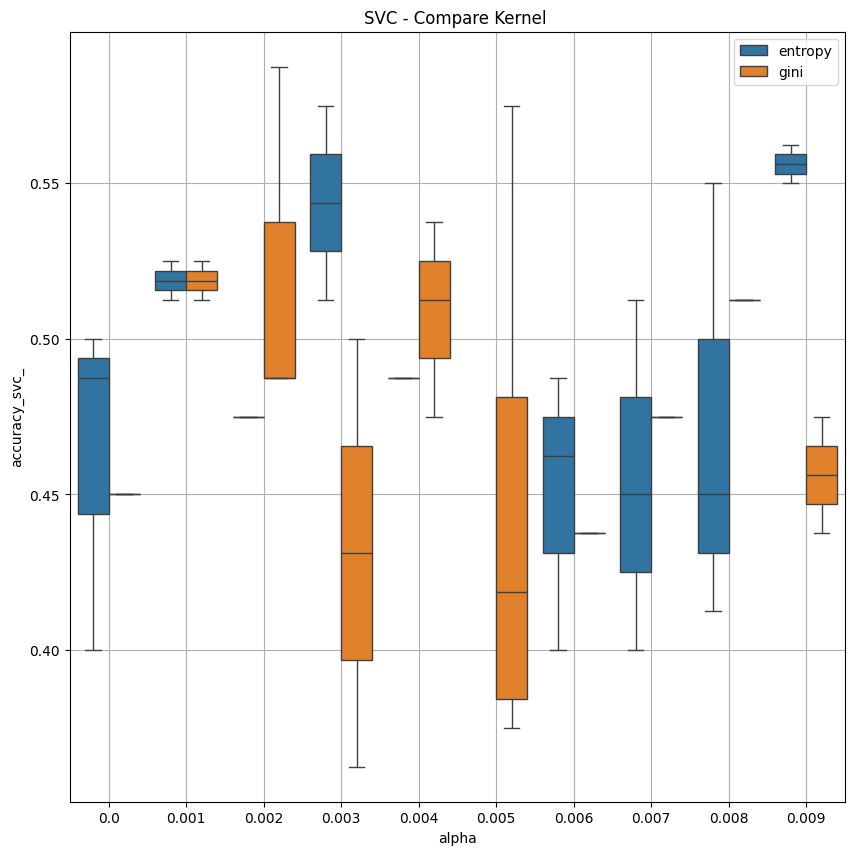

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

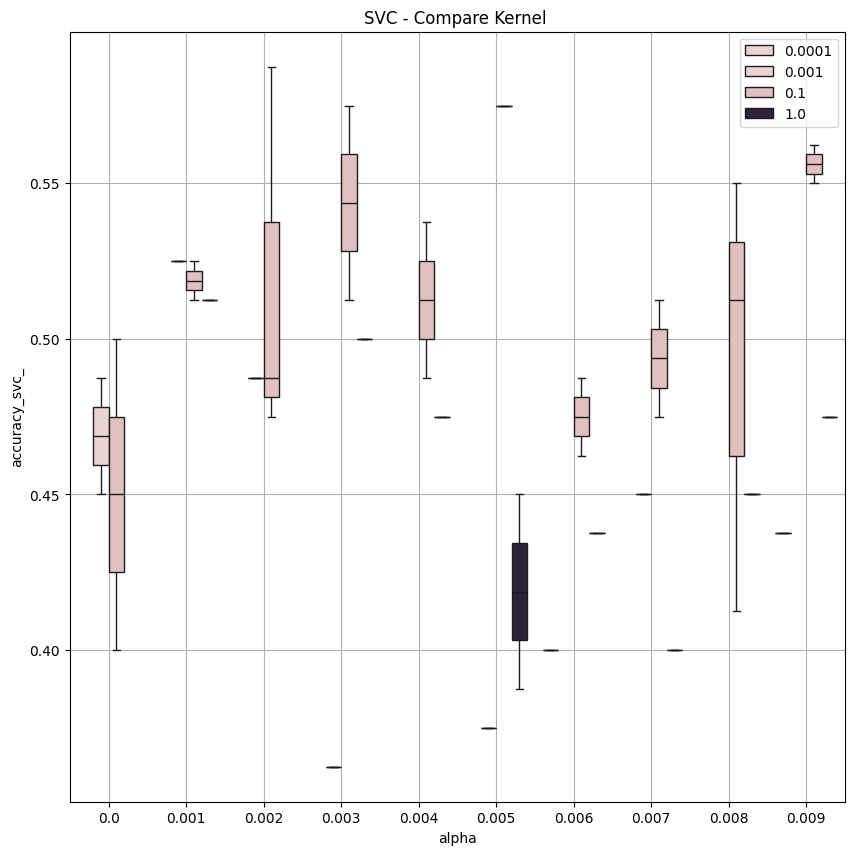

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

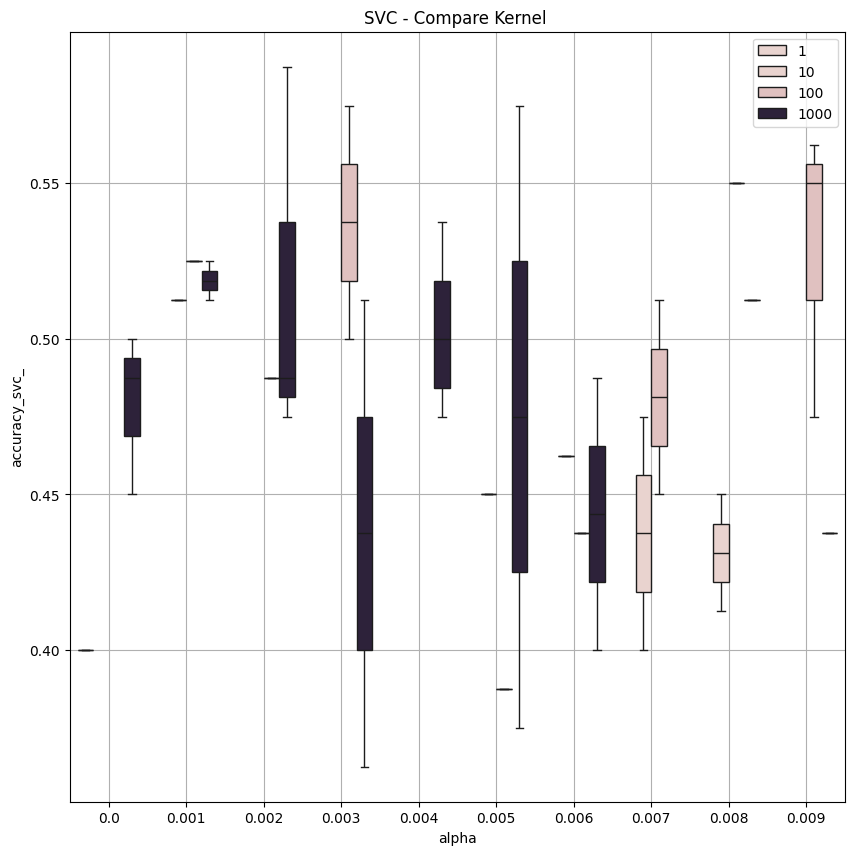

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


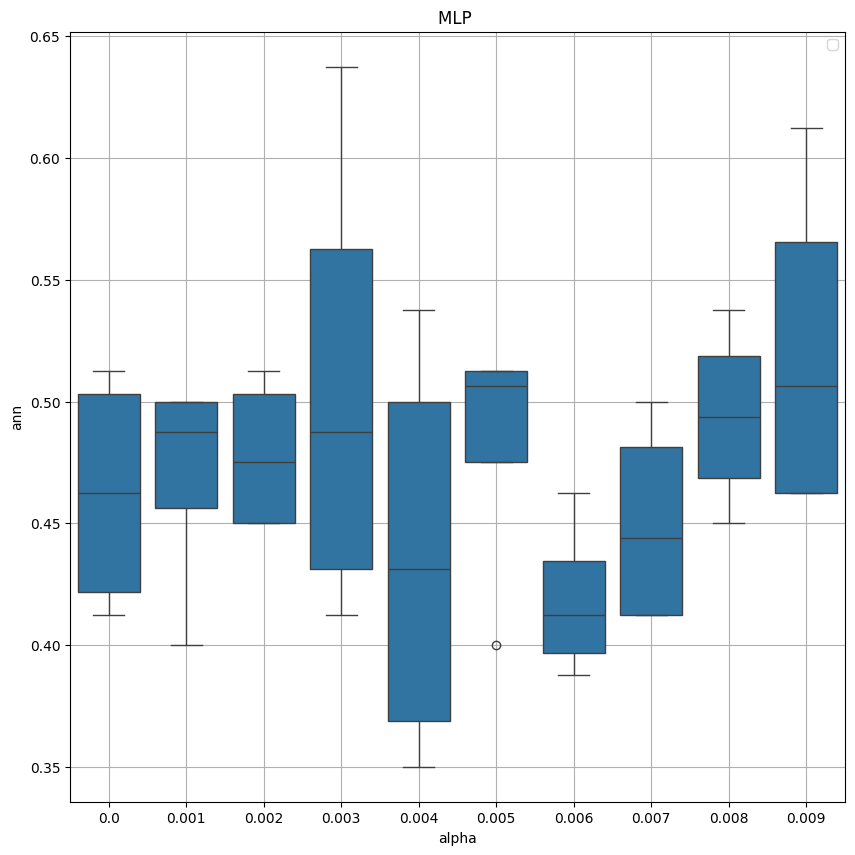

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
